In [70]:
import os
import numpy as np
import pandas as pd

# Import Data

> ## Only First 3 Rows

In [17]:
# Read excel file with sheet name
dict_df = pd.read_excel('/home/kannika/codes_AI/Rheology_Blood/All_lab_results_Blood_viscosity_work.xlsx', 
                   sheet_name=['Patients_CutSpleen','Patients_NoCutSpleen', 'Normal'], header=2)
dict_df

{'Patients_CutSpleen':     No.  Code       HN     PC  PS activity  Free PS    Hb   Hct    WBC  \
 0     1  HN01  2045512   76.8         43.0     58.6   6.0  19.7  12590   
 1     2  HN02  4045280  100.4         58.8     70.6   7.2  23.6  17840   
 2     3  HN03  3024257   75.6         52.5     57.9   9.0  28.6  12640   
 3     4  HN04  1257101   31.7         57.7     59.3   7.6  23.7  13910   
 4     6  HN06  1797136   43.7         41.1     77.3   8.2  24.8  16180   
 5     7  HN07  2234214   66.4         54.5     62.1   8.2  24.3  10710   
 6    12  HN12  1110168   87.8         39.3     60.0   9.8  30.6  14450   
 7    13  HN13  3949905   50.4         37.0     83.6   5.8  18.0  15240   
 8    16  HN16  1665191   79.0         47.4     59.1  10.6  32.7  13530   
 9    17  HN17  2272494   47.6         34.2     59.6   7.1  21.3  16810   
 10   19  HN19  1513782   55.5         83.0     76.6   8.9  27.9  10050   
 11   23  HN23  2028715   46.7         51.9     62.8   5.0  15.9  12230   
 12

In [20]:
dict_sheet =  ['Patients_CutSpleen','Patients_NoCutSpleen', 'Normal']
lstdict_code  = []
for sheet in dict_sheet:
    df_sheet = dict_df[sheet]
    df_sheet["sheet"] = sheet
    dict_code = df_sheet[["Code", "sheet"]]
    lstdict_code.append(dict_code)
    print(dict_df[sheet].shape)

print(len(lstdict_code))
df_dictCode = pd.concat(lstdict_code, ignore_index=True)
print(df_dictCode.shape)
df_dictCode

(22, 47)
(22, 47)
(24, 36)
3
(68, 2)


,Code,sheet
0,HN01,Patients_CutSpleen
1,HN02,Patients_CutSpleen
2,HN03,Patients_CutSpleen
3,HN04,Patients_CutSpleen
4,HN06,Patients_CutSpleen
...,...,...
63,NBL19,Normal
64,NBL20,Normal
65,NBL21,Normal
66,NBL22,Normal


# Check DATA

In [24]:
dict_df["Patients_NoCutSpleen"].head(3)

,No.,Code,HN,PC,PS activity,Free PS,Hb,Hct,WBC,Promyelocyte,...,Creatinine,eGFR,Ferritin,TSH,FT4,FT3,Cortisol,ABO,Rh(D),sheet
0,5,HN05,1720866,37.3,37.0,51.5,5.9,18.0,18990,NaN,...,0.42,155.13,702,3.68,0.85,2.97,8.12,O,Pos,Patients_NoCutSpleen
1,8,HN08,2822375,74.2,60.7,67.4,8.4,26.9,10140,NaN,...,0.5,137.82,912,1.58,1.03,2.83,10.4,O,Pos,Patients_NoCutSpleen
2,9,HN09,4122237,80.8,66.9,65.6,8.4,25.9,8240,NaN,...,0.35,158.28,2245,2.3,0.99,3.52,8.17,O,Pos,Patients_NoCutSpleen


In [25]:
dict_df["Patients_CutSpleen"].head(3)

,No.,Code,HN,PC,PS activity,Free PS,Hb,Hct,WBC,Promyelocyte,...,Creatinine,eGFR,Ferritin,TSH,FT4,FT3,Cortisol,ABO,Rh(D),sheet
0,1,HN01,2045512,76.8,43.0,58.6,6.0,19.7,12590,NaN,...,0.38,144.62,537,1.1,0.94,2.98,8.74,A,Pos,Patients_CutSpleen
1,2,HN02,4045280,100.4,58.8,70.6,7.2,23.6,17840,NaN,...,0.47,142.65,342,1.23,0.87,2.61,10.3,A,Pos,Patients_CutSpleen
2,3,HN03,3024257,75.6,52.5,57.9,9.0,28.6,12640,NaN,...,0.53,119.15,440,1.72,1.52,2.72,1.6,O,Pos,Patients_CutSpleen


In [35]:
dict_df["Normal"].head(3)

,No.,Code,PC,PS activity,Free PS,Hb,Hct,WBC,Promyelocyte,Myelocyte,...,NRBC,RDW,Plt. Large cell ratio,PT,INR,PTT,PTT Ratio,ADP,Collagen,sheet
0,1,NBL00,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,Normal
1,2,NBL01,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,Normal
2,3,NBL02,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,Normal


In [8]:
rootbase = "/home/kannika/codes_AI/Rheology_Blood/BloodCMU"
Row_name, Row_x, Row_y, Row_code = [], [], [], []
Row_pth = os.listdir(rootbase)
print(len(Row_pth))
#Row_pth
for row in Row_pth:
    print(f"[INFO]:Process on code {row}")
    df_Row = pd.read_csv(f"{rootbase}/{row}")
    df_Row["Row_name"] = row
    Code_  = row.split(" ")[-1]
    Code0_ = Code_.split(".")[0]
    df_Row0 = df_Row.head(3)
    df_Row0.columns.values[0] = "x"
    df_Row0.columns.values[1] = "y"
    df_Row0["Row_code"] = Code0_
    Row_name.append(list(df_Row0["Row_name"]))
    Row_x.append(list(df_Row0["x"]))
    Row_y.append(list(df_Row0["y"]))
    Row_code.append(df_Row0["Row_code"])
    #print(df_Row.shape[0])
#row_dict = dict(zip(Row_name, prices))

45
[INFO]:Process on code Row statistics of NBL07.csv
[INFO]:Process on code Row statistics of HN38.csv
[INFO]:Process on code Row statistics of HN07.csv
[INFO]:Process on code Row statistics of HN10.csv
[INFO]:Process on code Row statistics of HN26.csv
[INFO]:Process on code Row statistics of HN20.csv
[INFO]:Process on code Row statistics of NBL13.csv
[INFO]:Process on code Row statistics of HN05.csv
[INFO]:Process on code Row statistics of HN37.csv
[INFO]:Process on code Row statistics of HN41.csv
[INFO]:Process on code Row statistics of HN27.csv
[INFO]:Process on code Row statistics of NBL11.csv
[INFO]:Process on code Row statistics of NBL08.csv
[INFO]:Process on code Row statistics of HN17.csv
[INFO]:Process on code Row statistics of NBL12.csv
[INFO]:Process on code Row statistics of NBL02.csv
[INFO]:Process on code Row statistics of HN09.csv
[INFO]:Process on code Row statistics of HN11.csv
[INFO]:Process on code Row statistics of NBL19.csv
[INFO]:Process on code Row statistics of

/tmp/ipykernel_209094/1709308313.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Row0["Row_code"] = Code0_
/tmp/ipykernel_209094/1709308313.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Row0["Row_code"] = Code0_
/tmp/ipykernel_209094/1709308313.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [9]:
def flatten_list(l):
    flat_list = []
    for sublist in l:
        for item in sublist:
            flat_list.append(item)
    return flat_list

In [10]:
Row_code0 = flatten_list(Row_code)
Row_name0 = flatten_list(Row_name)
Row_x0 = flatten_list(Row_x)
Row_y0 = flatten_list(Row_y)

print(len(Row_name0))
print(len(Row_code0))
print(len(Row_x0))
print(len(Row_y0))

DataFrame_Blood = pd.DataFrame(
    {'name': Row_name0,
     'Code': Row_code0,
     'x': Row_x0,
     'y': Row_y0
    })
print(DataFrame_Blood.shape)
DataFrame_Blood

135
135
135
135
(135, 4)


,name,Code,x,y
0,Row statistics of NBL07.csv,NBL07,19.828200,0.003430
1,Row statistics of NBL07.csv,NBL07,7.900978,0.008548
2,Row statistics of NBL07.csv,NBL07,5.604837,0.011782
3,Row statistics of HN38.csv,HN38,19.917410,0.002190
4,Row statistics of HN38.csv,HN38,7.930730,0.005455
...,...,...,...,...
130,Row statistics of HN30.csv,HN30,7.899895,0.006418
131,Row statistics of HN30.csv,HN30,5.600707,0.008427
132,Row statistics of HN31.csv,HN31,19.755610,0.001217
133,Row statistics of HN31.csv,HN31,7.845877,0.003036


In [11]:
## meage sheet vs. code  
result = pd.merge(DataFrame_Blood, df_dictCode, how="left", on=["Code", "Code"])
print(result.shape)
result

(135, 5)


,name,Code,x,y,sheet
0,Row statistics of NBL07.csv,NBL07,19.828200,0.003430,Normal
1,Row statistics of NBL07.csv,NBL07,7.900978,0.008548,Normal
2,Row statistics of NBL07.csv,NBL07,5.604837,0.011782,Normal
3,Row statistics of HN38.csv,HN38,19.917410,0.002190,Patients_NoCutSpleen
4,Row statistics of HN38.csv,HN38,7.930730,0.005455,Patients_NoCutSpleen
...,...,...,...,...,...
130,Row statistics of HN30.csv,HN30,7.899895,0.006418,Patients_NoCutSpleen
131,Row statistics of HN30.csv,HN30,5.600707,0.008427,Patients_NoCutSpleen
132,Row statistics of HN31.csv,HN31,19.755610,0.001217,Patients_NoCutSpleen
133,Row statistics of HN31.csv,HN31,7.845877,0.003036,Patients_NoCutSpleen


In [87]:
result.to_csv('/home/kannika/codes_AI/Rheology_Blood/All_lab_results_Blood_viscosity_plot.csv')

In [15]:
result['sheet'].isnull().values.any()

False

## Plot Blood Spleen Group  

3
[INFO] Sheet : Patients_NoCutSpleen with Shape ==> 48
[INFO] Sheet : Patients_CutSpleen with Shape ==> 36
[INFO] Sheet : Normal with Shape ==> 51


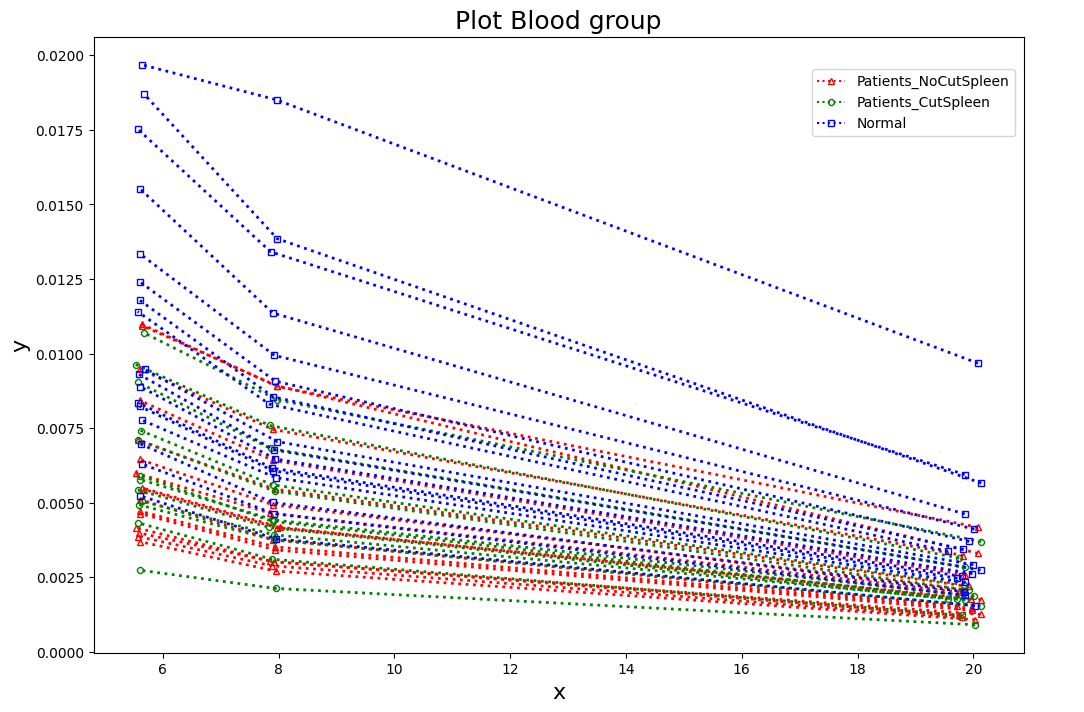

In [12]:
import matplotlib.pyplot as plt


set_sheet = list(set(result['sheet']))
print(len(set_sheet))
set_sheet
#lt.figure(figsize=(12, 8))
fig = plt.figure(figsize=(12, 8))
handles_markers = []
markers_labels = []
colors_labels = []
for s in set_sheet:
    result0 = result[result["sheet"]==s]
    if s == "Patients_NoCutSpleen":
        colors="red"
        markers="^"
    elif s == "Patients_CutSpleen":
        colors="green"
        markers="8"
    elif s == "Normal":
        colors="blue"
        markers="s"
    markers_labels.append(markers)
    colors_labels.append(colors)
    print(f"[INFO] Sheet : {s} with Shape ==> {result0.shape[0]}")
    set_code = list(set(result0["Code"]))
    for sc in set_code:
        df_SetCode = result0[result0["Code"]==sc].reset_index(drop=True)    
        x = df_SetCode["x"].tolist()
        y = df_SetCode["y"].tolist()
    
        #plt.style.use('seaborn')
        plot_handles = plt.plot(x, y, ls=":", marker=markers, markersize=5,lw=2, markerfacecolor="None",color=colors)
        markers_labels.append(s)
        handles_markers.append(handles_markers)
       #plt.plot(x, y, ls=":", marker="8", markersize=4, lw=2, markerfacecolor="None",color=colors)
       #plt.plot(t_x, list_preEff, ls=":", marker="^", markersize=4, lw=2, markerfacecolor="None", label="EffNetB7 Model")
#         plt.plot(t_x, list_meanM, ls=":", marker="s", markersize=4, lw=2, markerfacecolor="None", label="MSDT Algorithm", color="red")

plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.title('Plot Blood group', fontsize=18)

import matplotlib.lines as mlines
red_line = mlines.Line2D([], [], color='red',markersize=5, label='Patients_NoCutSpleen', linestyle=":", marker="^", markerfacecolor="None")
green_line = mlines.Line2D([], [], color='green', markersize=5, label='Patients_CutSpleen', linestyle=":", marker="8", markerfacecolor="None")
blue_line = mlines.Line2D([], [], color='blue', markersize=5, label='Normal', linestyle=":", marker="s", markerfacecolor="None")

handles = [red_line,green_line, blue_line]
labels = [h.get_label() for h in handles] 

fig.legend(handles=handles, labels=labels, borderaxespad=5)

plt.show()

## 🧸 Clustering Spleen Group

> Sheet "Normal" ==> Skip 4 rows

> Columns Cut off: 


In [36]:
A = dict_df["Patients_NoCutSpleen"]
B = dict_df["Patients_CutSpleen"]
C = dict_df["Normal"]
C = C.iloc[4:,:]
C = C.reset_index(drop=True)
all_lst_columns = []
print(A.shape)
print(B.shape)
print(C.shape)
df = [A, B, C]
for j in range(len(df)):
    print(len(list(df[j].columns)))
    lst_columns = list(df[j].columns)
    all_lst_columns.append(lst_columns)
    print(lst_columns)
    print("="*123)

(22, 47)
(22, 47)
(20, 36)
47
['No.', 'Code', 'HN', 'PC', 'PS activity', 'Free PS', 'Hb', 'Hct', 'WBC', 'Promyelocyte', 'Myelocyte', 'Band', 'Abnormal WBC', 'NE', 'EO', 'BA', 'LY', 'MO', 'Plt. Count', 'RBC', 'MCV', 'MCH', 'MCHC', 'MPV', 'PDW', 'Abs NE count', 'Abs LY count', 'NRBC', 'RDW', 'Plt. Large cell ratio', 'PT', 'INR', 'PTT', 'PTT Ratio', 'ADP', 'Collagen', 'Bun', 'Creatinine', 'eGFR', 'Ferritin', 'TSH', 'FT4', 'FT3', 'Cortisol', 'ABO', 'Rh(D)', 'sheet']
47
['No.', 'Code', 'HN', 'PC', 'PS activity', 'Free PS', 'Hb', 'Hct', 'WBC', 'Promyelocyte', 'Myelocyte', 'Band', 'Abnormal WBC', 'NE', 'EO', 'BA', 'LY', 'MO', 'Plt. Count', 'RBC', 'MCV', 'MCH', 'MCHC', 'MPV', 'PDW', 'Abs NE count', 'Abs LY count', 'NRBC', 'RDW', 'Plt. Large cell ratio', 'PT', 'INR', 'PTT', 'PTT Ratio', 'ADP', 'Collagen', 'Bun', 'Creatinine', 'eGFR', 'Ferritin', 'TSH', 'FT4', 'FT3', 'Cortisol', 'ABO', 'Rh(D)', 'sheet']
36
['No.', 'Code', 'PC', 'PS activity', 'Free PS', 'Hb', 'Hct', 'WBC', 'Promyelocyte', 'Myelo

In [77]:
#22+22+20

64

In [34]:
col_A = set(all_lst_columns[0])
col_B = set(all_lst_columns[1])
col_C = set(all_lst_columns[2])

In [49]:
col_A-col_B

set()

In [50]:
col_B-col_A

set()

In [54]:
_setAC = col_A-col_C
_setAC

{'ABO',
 'Bun',
 'Cortisol',
 'Creatinine',
 'FT3',
 'FT4',
 'Ferritin',
 'HN',
 'Rh(D)',
 'TSH',
 'eGFR'}

In [55]:
_setBC = col_B-col_C
_setBC

{'ABO',
 'Bun',
 'Cortisol',
 'Creatinine',
 'FT3',
 'FT4',
 'Ferritin',
 'HN',
 'Rh(D)',
 'TSH',
 'eGFR'}

In [56]:
_setAC-_setBC

set()

In [57]:
_setBC-_setAC

set()

####  Base on Columns in "Normal" DataFrame

> **36 columns**


In [59]:
C.isna().any()

No.                      False
Code                     False
PC                       False
PS activity              False
Free PS                  False
Hb                       False
Hct                      False
WBC                      False
Promyelocyte              True
Myelocyte                 True
Band                      True
Abnormal WBC              True
NE                       False
EO                       False
BA                       False
LY                       False
MO                       False
Plt. Count               False
RBC                      False
MCV                      False
MCH                      False
MCHC                     False
MPV                      False
PDW                      False
Abs NE count             False
Abs LY count             False
NRBC                     False
RDW                      False
Plt. Large cell ratio    False
PT                       False
INR                      False
PTT                      False
PTT Rati

In [60]:
C_ = C.dropna(axis=1, how='all')
print(C_.shape)
C_.isna().any()

(20, 32)


No.                      False
Code                     False
PC                       False
PS activity              False
Free PS                  False
Hb                       False
Hct                      False
WBC                      False
NE                       False
EO                       False
BA                       False
LY                       False
MO                       False
Plt. Count               False
RBC                      False
MCV                      False
MCH                      False
MCHC                     False
MPV                      False
PDW                      False
Abs NE count             False
Abs LY count             False
NRBC                     False
RDW                      False
Plt. Large cell ratio    False
PT                       False
INR                      False
PTT                      False
PTT Ratio                False
ADP                      False
Collagen                 False
sheet                    False
dtype: b

In [62]:
list_columsBase = list(C_.columns)
print(len(list_columsBase))
print(list_columsBase)

32
['No.', 'Code', 'PC', 'PS activity', 'Free PS', 'Hb', 'Hct', 'WBC', 'NE', 'EO', 'BA', 'LY', 'MO', 'Plt. Count', 'RBC', 'MCV', 'MCH', 'MCHC', 'MPV', 'PDW', 'Abs NE count', 'Abs LY count', 'NRBC', 'RDW', 'Plt. Large cell ratio', 'PT', 'INR', 'PTT', 'PTT Ratio', 'ADP', 'Collagen', 'sheet']


['PC', 'PS activity', 'Free PS', 'Hb', 'Hct', 'WBC', 'NE', 'EO', 'BA', 'LY', 'MO', 'Plt. Count', 'RBC', 'MCV', 'MCH', 'MCHC', 'MPV', 'PDW', 'Abs NE count', 'Abs LY count', 'NRBC', 'RDW', 'Plt. Large cell ratio', 'PT', 'INR', 'PTT', 'PTT Ratio', 'ADP', 'Collagen']

In [72]:
# columsBase = ['PC', 'PS activity', 'Free PS', 'Hb', 'Hct', 'WBC', 'NE', 'EO', 'BA', 'LY', 'MO', 'Plt. Count', 
#                   'RBC', 'MCV', 'MCH', 'MCHC', 'MPV', 'PDW', 'Abs NE count', 'Abs LY count', 'NRBC', 'RDW', 
#                   'Plt. Large cell ratio', 'PT', 'INR', 'PTT', 'PTT Ratio', 'ADP', 'Collagen']
# print(len(columsBase))
# print(columsBase)

In [73]:
df = [A, B, C]
column_cutoff = []
for j in range(len(df)): 
    df_G = df[j]
    for col in list_columsBase:
        for i in range(len(df_G)):
            if df_G[col][i] == '-':
                column_cutoff.append(col)

In [74]:
## Columns ที่มี Missing Value 
setcolumn_cutoff = list(set(column_cutoff))
print(len(setcolumn_cutoff))
print(setcolumn_cutoff)

6
['ADP', 'PDW', 'Plt. Large cell ratio', 'MPV', 'Collagen', 'RDW']


In [70]:
29-6

23

In [76]:
columscuster = list(set(list_columsBase)-set(setcolumn_cutoff))
print(len(columscuster))
print(columscuster)

26
['NE', 'INR', 'MO', 'LY', 'BA', 'Plt. Count', 'NRBC', 'WBC', 'MCHC', 'sheet', 'No.', 'Code', 'PC', 'PTT Ratio', 'MCH', 'MCV', 'PTT', 'Abs LY count', 'Hct', 'PT', 'Free PS', 'RBC', 'EO', 'Hb', 'PS activity', 'Abs NE count']


In [37]:
### 'sheet', 'No.', 'Code' 
lstdf_custer = []
df = [A, B, C]
update_columscuster = ['No.', 'Code', 'NE', 'INR', 'MO', 'LY', 'BA', 'Plt. Count', 'NRBC', 'WBC', 'MCHC', 
                         'PC', 'PTT Ratio', 'MCH', 'MCV', 'PTT', 'Abs LY count', 'Hct', 'PT', 
                         'Free PS', 'RBC', 'EO', 'Hb', 'PS activity', 'Abs NE count', 'sheet']

for j in range(len(df)): 
    df_G = df[j]
    df_custer = df_G[update_columscuster]
    lstdf_custer.append(df_custer)
print(len(lstdf_custer))

DFcuster_concat = pd.concat(lstdf_custer, ignore_index=True)
print(DFcuster_concat.shape)
DFcuster_concat

3
(64, 26)


,No.,Code,NE,INR,MO,LY,BA,Plt. Count,NRBC,WBC,...,Abs LY count,Hct,PT,Free PS,RBC,EO,Hb,PS activity,Abs NE count,sheet
0,5,HN05,29.2,1.34,7.1,60.0,1.2,464000,15.3,18990,...,11400,18.0,15.6,51.5,2.49,2.5,5.9,37.0,5540,Patients_NoCutSpleen
1,8,HN08,68.2,1.06,4.1,26.3,0.7,242000,4.1,10140,...,2670,26.9,12.2,67.4,4.02,0.7,8.4,60.7,6910,Patients_NoCutSpleen
2,9,HN09,64.0,1.12,4.0,30.3,0.5,323000,4.1,8240,...,2500,25.9,13.0,65.6,3.57,1.2,8.4,66.9,5270,Patients_NoCutSpleen
3,10,HN10,55.4,0.99,5.9,35.6,1.4,549000,70.1,13130,...,4670,28.9,11.4,53.4,3.52,1.7,9.0,51.2,7290,Patients_NoCutSpleen
4,11,HN11,72.2,1.05,3.9,22.7,0.4,183000,2.0,7170,...,1630,26.6,12.1,74.8,4.47,0.8,8.5,70.2,5170,Patients_NoCutSpleen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,20,NBL19,54.2,0.9,4.7,37.3,0.6,284000,0.2,6590,...,2460,46.1,10.3,65.1,5.15,3.2,14.3,60.9,3570,Normal
60,21,NBL20,51.1,0.97,4.3,39.6,0.7,302000,0.2,5410,...,2140,44.2,11.1,109.8,4.64,4.3,14.7,57.6,2770,Normal
61,22,NBL21,62,0.94,5.8,29.1,0.4,253000,0,7450,...,2170,45.4,10.8,86,6.06,2.7,14.5,76.3,4620,Normal
62,23,NBL22,64,0.85,5.5,27.9,0.5,267000,0,7960,...,2220,46.2,9.7,82.4,6.15,21,15.2,73.2,5090,Normal


In [38]:
DFcuster_concat.to_csv('/home/kannika/codes_AI/Rheology_Blood/All_lab_results_Blood_viscosity_64work.csv')

In [80]:
DFcuster_concat.isna().any()

No.             False
Code            False
NE              False
INR             False
MO              False
LY              False
BA              False
Plt. Count      False
NRBC            False
WBC             False
MCHC            False
PC              False
PTT Ratio       False
MCH             False
MCV             False
PTT             False
Abs LY count    False
Hct             False
PT              False
Free PS         False
RBC             False
EO              False
Hb              False
PS activity     False
Abs NE count    False
sheet           False
dtype: bool

## ⏳ CLUSTERING ANALYSIS

In [40]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

## 1. Standardize

In [41]:
del_cols = ['No.', 'Code', 'sheet']
ds = DFcuster_concat.drop(del_cols, axis=1)
scaler = StandardScaler()
scaler.fit(ds)
scaled_features = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

print(scaled_features.shape)
scaled_features

(64, 23)


,NE,INR,MO,LY,BA,Plt. Count,NRBC,WBC,MCHC,PC,...,PTT,Abs LY count,Hct,PT,Free PS,RBC,EO,Hb,PS activity,Abs NE count
0,-2.032864,1.837887,0.532224,2.081430,0.305497,0.458168,-0.332176,2.207969,1.107381,-1.401256,...,2.234108,3.000451,-1.238816,1.937820,-1.028502,-1.274265,-0.036632,-1.118623,-1.321430,0.253684
1,1.216386,-0.073601,-0.524519,-1.030902,-0.249952,-0.659369,-0.425996,0.114715,-0.145611,-0.210209,...,2.195688,-0.408553,-0.265131,-0.051188,-0.038993,0.107070,-0.599299,-0.276762,0.253075,0.885587
2,0.866466,0.336004,-0.559744,-0.661486,-0.472131,-0.251619,-0.425996,-0.334684,0.794133,0.002824,...,-0.378505,-0.474937,-0.374534,0.416814,-0.151013,-0.299205,-0.443003,-0.276762,0.664971,0.129148
3,0.149965,-0.551473,0.109527,-0.172009,0.527676,0.886054,0.126868,0.821927,-0.223923,-0.052048,...,-0.051928,0.372433,-0.046325,-0.519190,-0.910259,-0.344346,-0.286706,-0.074715,-0.378055,1.060859
4,1.549642,-0.141868,-0.594969,-1.363377,-0.583221,-0.956372,-0.443587,-0.587767,0.480885,-0.274764,...,0.024913,-0.814666,-0.297952,-0.109688,0.421533,0.513345,-0.568040,-0.243087,0.884206,0.083024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.049988,-1.165879,-0.313170,-0.015008,-0.361041,-0.447943,-0.458665,-0.724952,-0.302235,1.277794,...,-0.244032,-0.490557,1.835404,-1.162692,-0.182130,1.127272,0.182183,1.710031,0.266362,-0.654965
60,-0.208285,-0.688008,-0.454069,0.197407,-0.249952,-0.357332,-0.458665,-1.004052,1.498941,1.300388,...,-0.051928,-0.615515,1.627538,-0.694690,2.599698,0.666827,0.526035,1.844729,0.047127,-1.023960
61,0.699838,-0.892810,0.074302,-0.772311,-0.583221,-0.603995,-0.460340,-0.521539,0.402573,0.690340,...,-0.051928,-0.603800,1.758822,-0.870191,1.118546,1.948851,0.025887,1.777380,1.289458,-0.170660
62,0.866466,-1.507217,-0.031372,-0.883136,-0.472131,-0.533520,-0.460340,-0.400911,1.185693,0.774262,...,-0.820344,-0.584275,1.846344,-1.513693,0.894506,2.030106,5.746334,2.013101,1.083510,0.046124


## 🪅Clustering

/home/kannika/miniconda3/envs/tfNetV2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kannika/miniconda3/envs/tfNetV2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kannika/miniconda3/envs/tfNetV2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kannika/miniconda3/envs/tfNetV2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

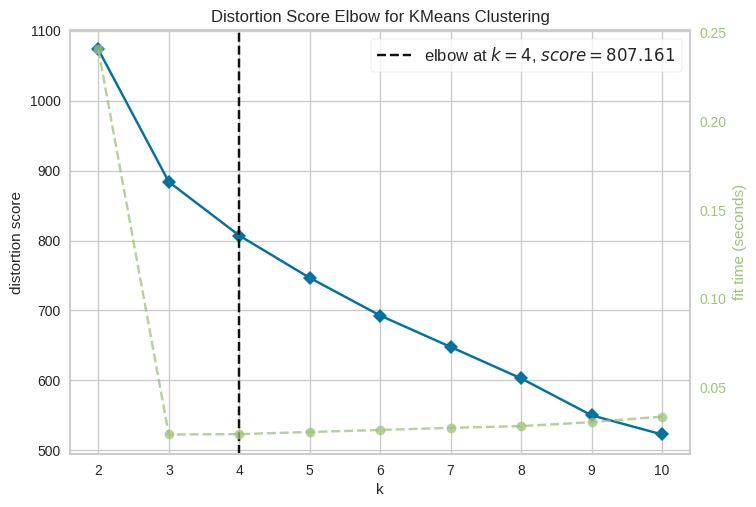

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [92]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)

visualizer.fit(scaled_features)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### #️⃣1. K=4

In [97]:
# Fit K-means clustering (**replace 'n_clusters' with the desired number of clusters**)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=10000, n_init=1000, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original data
scaled_features['4_Cluster'] = clusters
DFcuster_concat['4_Cluster'] = clusters

In [98]:
DFcuster_concat.head()

,No.,Code,NE,INR,MO,LY,BA,Plt. Count,NRBC,WBC,...,Hct,PT,Free PS,RBC,EO,Hb,PS activity,Abs NE count,sheet,4_Cluster
0,5,HN05,29.2,1.34,7.1,60.0,1.2,464000,15.3,18990,...,18.0,15.6,51.5,2.49,2.5,5.9,37.0,5540,Patients_NoCutSpleen,3
1,8,HN08,68.2,1.06,4.1,26.3,0.7,242000,4.1,10140,...,26.9,12.2,67.4,4.02,0.7,8.4,60.7,6910,Patients_NoCutSpleen,0
2,9,HN09,64.0,1.12,4.0,30.3,0.5,323000,4.1,8240,...,25.9,13.0,65.6,3.57,1.2,8.4,66.9,5270,Patients_NoCutSpleen,0
3,10,HN10,55.4,0.99,5.9,35.6,1.4,549000,70.1,13130,...,28.9,11.4,53.4,3.52,1.7,9.0,51.2,7290,Patients_NoCutSpleen,1
4,11,HN11,72.2,1.05,3.9,22.7,0.4,183000,2.0,7170,...,26.6,12.1,74.8,4.47,0.8,8.5,70.2,5170,Patients_NoCutSpleen,0


In [113]:
#DataFrame_Blood.head() 

In [2]:
#result_4cluster_.to_csv(('/home/kannika/codes_AI/Rheology_Blood/All_lab_results_Blood_viscosity_cluster.csv'))
result_4cluster_  =pd.read_csv('/home/kannika/codes_AI/Rheology_Blood/All_lab_results_Blood_viscosity_cluster.csv')
print(result_4cluster_.shape)
result_4cluster_.head()

(129, 32)


,Unnamed: 0,name,Code,x,y,No.,NE,INR,MO,LY,...,PT,Free PS,RBC,EO,Hb,PS activity,Abs NE count,sheet,4_Cluster,3_Cluster
0,0,Row statistics of NBL07.csv,NBL07,19.828200,0.003430,8.0,61.7,0.92,3.6,32.9,...,10.6,44.4,6.26,1.1,12.4,45.1,3420,Normal,2.0,1.0
1,1,Row statistics of NBL07.csv,NBL07,7.900978,0.008548,8.0,61.7,0.92,3.6,32.9,...,10.6,44.4,6.26,1.1,12.4,45.1,3420,Normal,2.0,1.0
2,2,Row statistics of NBL07.csv,NBL07,5.604837,0.011782,8.0,61.7,0.92,3.6,32.9,...,10.6,44.4,6.26,1.1,12.4,45.1,3420,Normal,2.0,1.0
3,3,Row statistics of HN38.csv,HN38,19.917410,0.002190,38.0,67.4,1.17,4.6,25.4,...,13.6,60.8,3.54,1.2,8.0,65.0,3830,Patients_NoCutSpleen,0.0,2.0
4,4,Row statistics of HN38.csv,HN38,7.930730,0.005455,38.0,67.4,1.17,4.6,25.4,...,13.6,60.8,3.54,1.2,8.0,65.0,3830,Patients_NoCutSpleen,0.0,2.0


In [110]:
result_4cluster = pd.merge(DataFrame_Blood, DFcuster_concat, how="left", on=["Code", "Code"])
result_4cluster_ =  result_4cluster[~result_4cluster.isnull().any(axis=1)]

print(result_4cluster_.shape)
result_4cluster_

(129, 31)


,name,Code,x,y,No.,NE,INR,MO,LY,BA,...,PT,Free PS,RBC,EO,Hb,PS activity,Abs NE count,sheet,4_Cluster,3_Cluster
0,Row statistics of NBL07.csv,NBL07,19.828200,0.003430,8.0,61.7,0.92,3.6,32.9,0.7,...,10.6,44.4,6.26,1.1,12.4,45.1,3420,Normal,2.0,1.0
1,Row statistics of NBL07.csv,NBL07,7.900978,0.008548,8.0,61.7,0.92,3.6,32.9,0.7,...,10.6,44.4,6.26,1.1,12.4,45.1,3420,Normal,2.0,1.0
2,Row statistics of NBL07.csv,NBL07,5.604837,0.011782,8.0,61.7,0.92,3.6,32.9,0.7,...,10.6,44.4,6.26,1.1,12.4,45.1,3420,Normal,2.0,1.0
3,Row statistics of HN38.csv,HN38,19.917410,0.002190,38.0,67.4,1.17,4.6,25.4,1.4,...,13.6,60.8,3.54,1.2,8.0,65.0,3830,Patients_NoCutSpleen,0.0,2.0
4,Row statistics of HN38.csv,HN38,7.930730,0.005455,38.0,67.4,1.17,4.6,25.4,1.4,...,13.6,60.8,3.54,1.2,8.0,65.0,3830,Patients_NoCutSpleen,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Row statistics of HN30.csv,HN30,7.899895,0.006418,30.0,54.2,1.21,1.9,37.4,3.7,...,14.0,38.2,4.23,0.9,6.6,32.9,8060,Patients_NoCutSpleen,1.0,2.0
131,Row statistics of HN30.csv,HN30,5.600707,0.008427,30.0,54.2,1.21,1.9,37.4,3.7,...,14.0,38.2,4.23,0.9,6.6,32.9,8060,Patients_NoCutSpleen,1.0,2.0
132,Row statistics of HN31.csv,HN31,19.755610,0.001217,31.0,47.0,1.18,3.5,47.7,0.4,...,13.7,55.5,2.82,1.4,6.0,40.6,1330,Patients_NoCutSpleen,0.0,2.0
133,Row statistics of HN31.csv,HN31,7.845877,0.003036,31.0,47.0,1.18,3.5,47.7,0.4,...,13.7,55.5,2.82,1.4,6.0,40.6,1330,Patients_NoCutSpleen,0.0,2.0


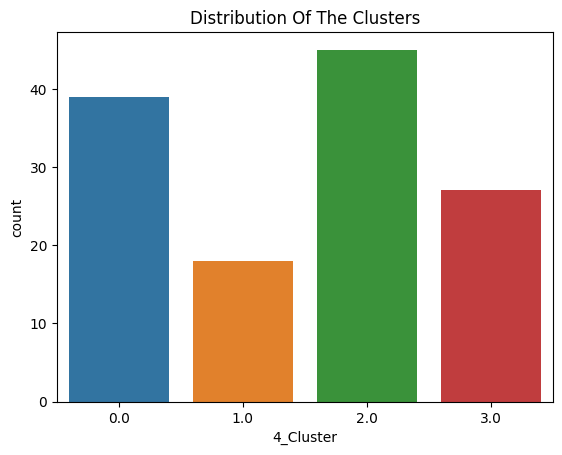

In [10]:
#Plotting countplot of clusters
import seaborn as sns

pl = sns.countplot(x=result_4cluster_["4_Cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

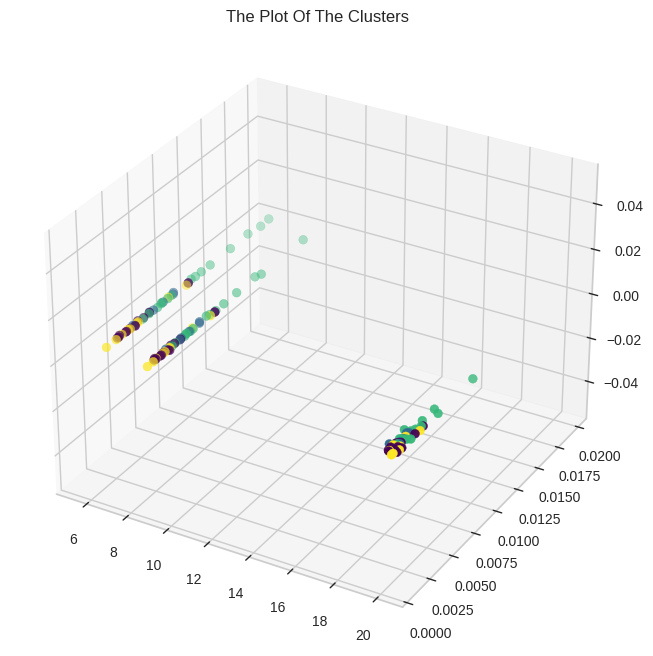

In [116]:
# Visualize the clusters using 'Glucose' and 'BMI'
#Plotting the clusters

#result_4cluster[result_4cluster['4_Cluster'].isna()]
x =result_4cluster_["x"]
y =result_4cluster_["y"]
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, s=40, c=result_4cluster_["4_Cluster"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [117]:
list(set(result_4cluster_['4_Cluster']))

[0.0, 1.0, 2.0, 3.0]

4
[INFO] Cluster : 0.0 with Shape ==> 39
[INFO] Cluster : 1.0 with Shape ==> 18
[INFO] Cluster : 2.0 with Shape ==> 45
[INFO] Cluster : 3.0 with Shape ==> 27


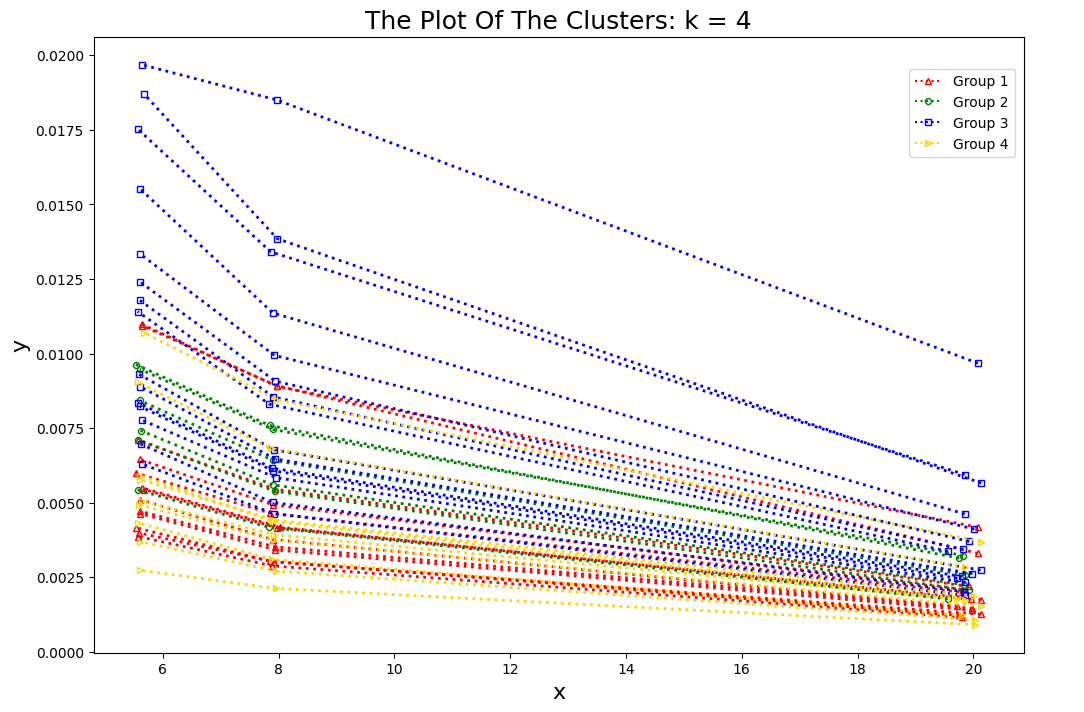

In [3]:
import matplotlib.pyplot as plt


set_sheet = list(set(result_4cluster_['4_Cluster']))
print(len(set_sheet))
set_sheet
#lt.figure(figsize=(12, 8))
fig = plt.figure(figsize=(12, 8))
handles_markers = []
markers_labels = []
colors_labels = []
for s in set_sheet:
    result0 = result_4cluster_[result_4cluster_["4_Cluster"]==s]
    if s == 0.0:
        colors="red"
        markers="^"
    elif s == 1.0:
        colors="green"
        markers="8"
    elif s == 2.0:
        colors="blue"
        markers="s"
    elif s == 3.0:
        colors="gold"
        markers=">"
    markers_labels.append(markers)
    colors_labels.append(colors)
    print(f"[INFO] Cluster : {s} with Shape ==> {result0.shape[0]}")
    set_code = list(set(result0["Code"]))
    for sc in set_code:
        df_SetCode = result0[result0["Code"]==sc].reset_index(drop=True)    
        x = df_SetCode["x"].tolist()
        y = df_SetCode["y"].tolist()
    
        #plt.style.use('seaborn')
        plot_handles = plt.plot(x, y, ls=":", marker=markers, markersize=5,lw=2, markerfacecolor="None",color=colors)
        markers_labels.append(s)
        handles_markers.append(handles_markers)
       #plt.plot(x, y, ls=":", marker="8", markersize=4, lw=2, markerfacecolor="None",color=colors)
       #plt.plot(t_x, list_preEff, ls=":", marker="^", markersize=4, lw=2, markerfacecolor="None", label="EffNetB7 Model")
#         plt.plot(t_x, list_meanM, ls=":", marker="s", markersize=4, lw=2, markerfacecolor="None", label="MSDT Algorithm", color="red")

plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.title('The Plot Of The Clusters: k = 4', fontsize=18)

import matplotlib.lines as mlines
red_line = mlines.Line2D([], [], color='red',markersize=5, label='Group 1', linestyle=":", marker="^", markerfacecolor="None")
green_line = mlines.Line2D([], [], color='green', markersize=5, label='Group 2', linestyle=":", marker="8", markerfacecolor="None")
blue_line = mlines.Line2D([], [], color='blue', markersize=5, label='Group 3', linestyle=":", marker="s", markerfacecolor="None")
gold_line = mlines.Line2D([], [], color='gold', markersize=5, label='Group 4', linestyle=":", marker=">", markerfacecolor="None")

handles = [red_line,green_line, blue_line, gold_line]
labels = [h.get_label() for h in handles] 

fig.legend(handles=handles, labels=labels, borderaxespad=5)

plt.show()

### #️⃣2. K=3

In [99]:
# Fit K-means clustering (**replace 'n_clusters' with the desired number of clusters**)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=3000,n_init=1000, random_state=0)
clusters2 = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original data
scaled_features['3_Cluster'] = clusters2
DFcuster_concat['3_Cluster'] = clusters2

In [100]:
DFcuster_concat.head()

,No.,Code,NE,INR,MO,LY,BA,Plt. Count,NRBC,WBC,...,PT,Free PS,RBC,EO,Hb,PS activity,Abs NE count,sheet,4_Cluster,3_Cluster
0,5,HN05,29.2,1.34,7.1,60.0,1.2,464000,15.3,18990,...,15.6,51.5,2.49,2.5,5.9,37.0,5540,Patients_NoCutSpleen,3,0
1,8,HN08,68.2,1.06,4.1,26.3,0.7,242000,4.1,10140,...,12.2,67.4,4.02,0.7,8.4,60.7,6910,Patients_NoCutSpleen,0,2
2,9,HN09,64.0,1.12,4.0,30.3,0.5,323000,4.1,8240,...,13.0,65.6,3.57,1.2,8.4,66.9,5270,Patients_NoCutSpleen,0,2
3,10,HN10,55.4,0.99,5.9,35.6,1.4,549000,70.1,13130,...,11.4,53.4,3.52,1.7,9.0,51.2,7290,Patients_NoCutSpleen,1,0
4,11,HN11,72.2,1.05,3.9,22.7,0.4,183000,2.0,7170,...,12.1,74.8,4.47,0.8,8.5,70.2,5170,Patients_NoCutSpleen,0,2


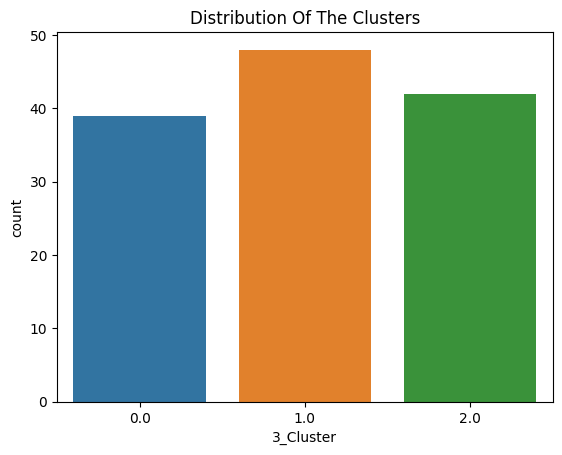

In [9]:
#Plotting countplot of clusters
import seaborn as sns

pl = sns.countplot(x=result_4cluster_["3_Cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

3
[INFO] Cluster : 0.0 with Shape ==> 39
[INFO] Cluster : 1.0 with Shape ==> 48
[INFO] Cluster : 2.0 with Shape ==> 42


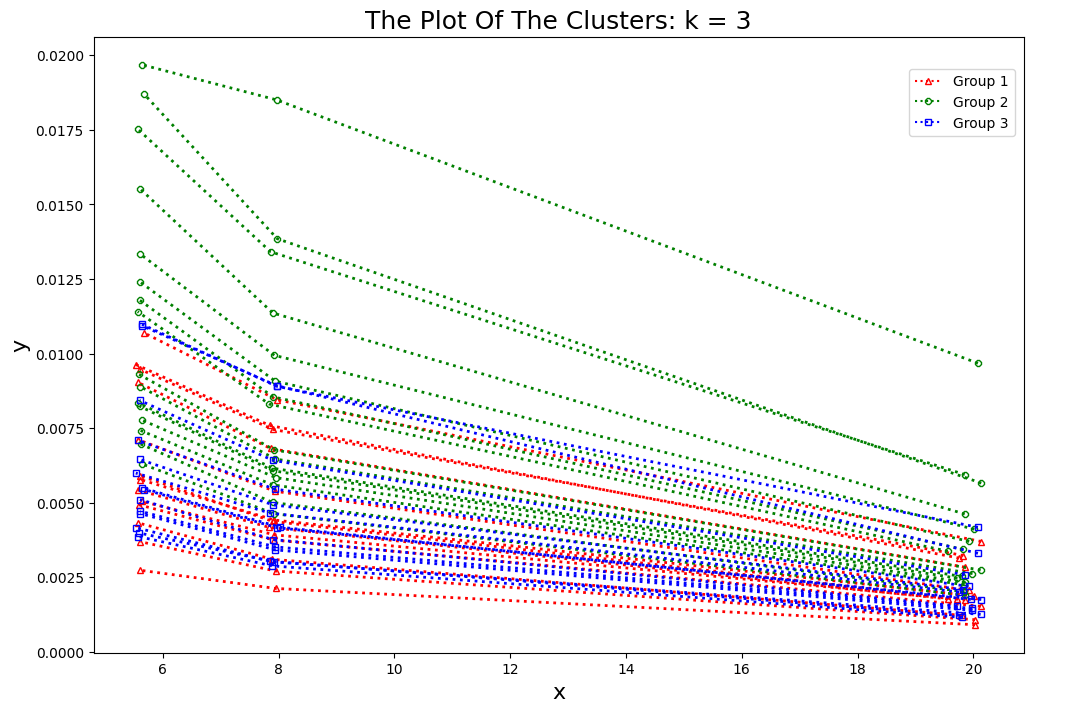

In [4]:
import matplotlib.pyplot as plt


set_sheet = list(set(result_4cluster_['3_Cluster']))
print(len(set_sheet))
set_sheet
#lt.figure(figsize=(12, 8))
fig = plt.figure(figsize=(12, 8))
handles_markers = []
markers_labels = []
colors_labels = []
for s in set_sheet:
    result0 = result_4cluster_[result_4cluster_["3_Cluster"]==s]
    if s == 0.0:
        colors="red"
        markers="^"
    elif s == 1.0:
        colors="green"
        markers="8"
    elif s == 2.0:
        colors="blue"
        markers="s"
    markers_labels.append(markers)
    colors_labels.append(colors)
    print(f"[INFO] Cluster : {s} with Shape ==> {result0.shape[0]}")
    set_code = list(set(result0["Code"]))
    for sc in set_code:
        df_SetCode = result0[result0["Code"]==sc].reset_index(drop=True)    
        x = df_SetCode["x"].tolist()
        y = df_SetCode["y"].tolist()
    
        #plt.style.use('seaborn')
        plot_handles = plt.plot(x, y, ls=":", marker=markers, markersize=5,lw=2, markerfacecolor="None",color=colors)
        markers_labels.append(s)
        handles_markers.append(handles_markers)
       #plt.plot(x, y, ls=":", marker="8", markersize=4, lw=2, markerfacecolor="None",color=colors)
       #plt.plot(t_x, list_preEff, ls=":", marker="^", markersize=4, lw=2, markerfacecolor="None", label="EffNetB7 Model")
#         plt.plot(t_x, list_meanM, ls=":", marker="s", markersize=4, lw=2, markerfacecolor="None", label="MSDT Algorithm", color="red")

plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.title('The Plot Of The Clusters: k = 3', fontsize=18)

import matplotlib.lines as mlines
red_line = mlines.Line2D([], [], color='red',markersize=5, label='Group 1', linestyle=":", marker="^", markerfacecolor="None")
green_line = mlines.Line2D([], [], color='green', markersize=5, label='Group 2', linestyle=":", marker="8", markerfacecolor="None")
blue_line = mlines.Line2D([], [], color='blue', markersize=5, label='Group 3', linestyle=":", marker="s", markerfacecolor="None")

handles = [red_line,green_line, blue_line]
labels = [h.get_label() for h in handles] 

fig.legend(handles=handles, labels=labels, borderaxespad=5)

plt.show()

### #️⃣3. K=2

In [116]:
#scaled_features

In [123]:
# Fit K-means clustering (**replace 'n_clusters' with the desired number of clusters**)
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=50000,n_init=5000, random_state=0)
clusters02 = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original data
scaled_features['2_Cluster'] = clusters02
DFcuster_concat['2_Cluster'] = clusters02
print(DFcuster_concat.shape)
DFcuster_concat.head()

(64, 27)


,No.,Code,NE,INR,MO,LY,BA,Plt. Count,NRBC,WBC,...,Hct,PT,Free PS,RBC,EO,Hb,PS activity,Abs NE count,sheet,2_Cluster
0,5,HN05,29.2,1.34,7.1,60.0,1.2,464000,15.3,18990,...,18.0,15.6,51.5,2.49,2.5,5.9,37.0,5540,Patients_NoCutSpleen,1
1,8,HN08,68.2,1.06,4.1,26.3,0.7,242000,4.1,10140,...,26.9,12.2,67.4,4.02,0.7,8.4,60.7,6910,Patients_NoCutSpleen,1
2,9,HN09,64.0,1.12,4.0,30.3,0.5,323000,4.1,8240,...,25.9,13.0,65.6,3.57,1.2,8.4,66.9,5270,Patients_NoCutSpleen,1
3,10,HN10,55.4,0.99,5.9,35.6,1.4,549000,70.1,13130,...,28.9,11.4,53.4,3.52,1.7,9.0,51.2,7290,Patients_NoCutSpleen,1
4,11,HN11,72.2,1.05,3.9,22.7,0.4,183000,2.0,7170,...,26.6,12.1,74.8,4.47,0.8,8.5,70.2,5170,Patients_NoCutSpleen,1


In [124]:
result_2cluster = pd.merge(DataFrame_Blood, DFcuster_concat, how="left", on=["Code", "Code"])
result_2cluster_ =  result_2cluster[~result_2cluster.isnull().any(axis=1)]

print(result_2cluster_.shape)
result_2cluster_.head()

(129, 32)


,Unnamed: 0,name,Code,x,y,sheet_x,No.,NE,INR,MO,...,Hct,PT,Free PS,RBC,EO,Hb,PS activity,Abs NE count,sheet_y,2_Cluster
0,0,Row statistics of NBL07.csv,NBL07,19.828200,0.003430,Normal,8.0,61.7,0.92,3.6,...,41.6,10.6,44.4,6.26,1.1,12.4,45.1,3420,Normal,0.0
1,1,Row statistics of NBL07.csv,NBL07,7.900978,0.008548,Normal,8.0,61.7,0.92,3.6,...,41.6,10.6,44.4,6.26,1.1,12.4,45.1,3420,Normal,0.0
2,2,Row statistics of NBL07.csv,NBL07,5.604837,0.011782,Normal,8.0,61.7,0.92,3.6,...,41.6,10.6,44.4,6.26,1.1,12.4,45.1,3420,Normal,0.0
3,3,Row statistics of HN38.csv,HN38,19.917410,0.002190,Patients_NoCutSpleen,38.0,67.4,1.17,4.6,...,25.8,13.6,60.8,3.54,1.2,8.0,65.0,3830,Patients_NoCutSpleen,1.0
4,4,Row statistics of HN38.csv,HN38,7.930730,0.005455,Patients_NoCutSpleen,38.0,67.4,1.17,4.6,...,25.8,13.6,60.8,3.54,1.2,8.0,65.0,3830,Patients_NoCutSpleen,1.0


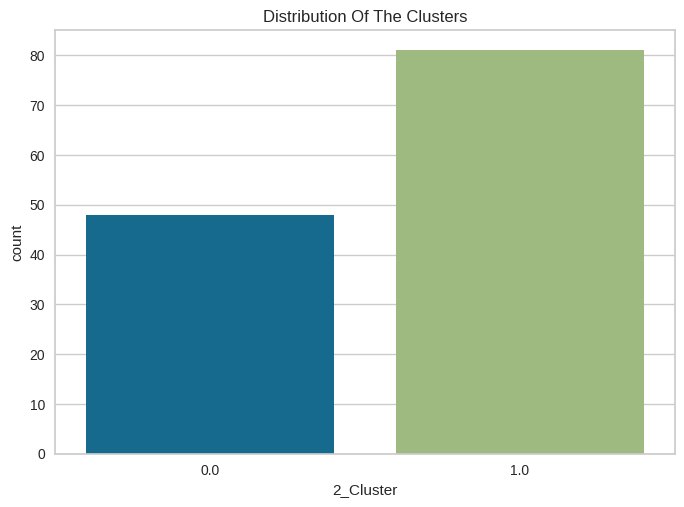

In [125]:
#Plotting countplot of clusters
import seaborn as sns

pl = sns.countplot(x=result_2cluster_["2_Cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [126]:
result_2cluster_.to_csv('/home/kannika/codes_AI/Rheology_Blood/All_lab_results_Blood_viscosity_clusterk2.csv')

## PCA

In [11]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=23)
 
pca.fit_transform(scaled_features)

array([[ 5.80156122e+00, -1.11173653e+00, -2.14011252e+00, ...,
        -3.14706175e-02,  2.11851013e-02,  8.88020702e-03],
       [ 6.23094284e-01,  2.88092861e+00,  3.68372562e-01, ...,
         1.45119269e-02,  8.23132660e-03, -2.30782657e-03],
       [-2.85204627e-01,  8.59238829e-01,  2.36800601e-01, ...,
        -3.77848083e-03,  8.26462552e-03,  2.96655089e-03],
       ...,
       [-3.62521029e+00,  4.42391149e-01, -1.92422886e-01, ...,
         1.07925547e-02, -7.06118270e-03,  1.58664418e-02],
       [-4.69146338e+00, -6.55052395e-01, -7.95999049e-01, ...,
         5.29972734e-03,  4.40403657e-04,  7.45294503e-04],
       [-3.16238083e+00,  8.41535174e-01,  2.04693399e+00, ...,
         4.84088277e-03,  1.94184018e-02, -3.64999788e-04]])

In [45]:
prop_var = pca.explained_variance_ratio_
prop_var

array([3.37293068e-01, 1.57430442e-01, 1.18832253e-01, 7.51580202e-02,
       6.42948025e-02, 5.36359460e-02, 3.72241965e-02, 3.64317477e-02,
       3.14339660e-02, 2.77880427e-02, 1.73824389e-02, 1.49040821e-02,
       1.21035165e-02, 8.03669888e-03, 3.95480746e-03, 2.55304189e-03,
       8.48074787e-04, 2.91435361e-04, 2.23625927e-04, 1.46743254e-04,
       2.23068995e-05, 6.96921807e-06, 3.77480539e-06])

In [55]:
#prop_var[0]+prop_var[1]+prop_var[2]+prop_var[3]+prop_var[4]+prop_var[5]

In [46]:
eigenvalues = pca.explained_variance_
eigenvalues

array([7.88087930e+00, 3.67837478e+00, 2.77652502e+00, 1.75607311e+00,
       1.50225316e+00, 1.25320813e+00, 8.69746305e-01, 8.51230677e-01,
       7.34457109e-01, 6.49269823e-01, 4.06142065e-01, 3.48235061e-01,
       2.82799624e-01, 1.87778107e-01, 9.24043901e-02, 5.96520265e-02,
       1.98153347e-02, 6.80941033e-03, 5.22503754e-03, 3.42866778e-03,
       5.21202478e-04, 1.62836333e-04, 8.81986275e-05])

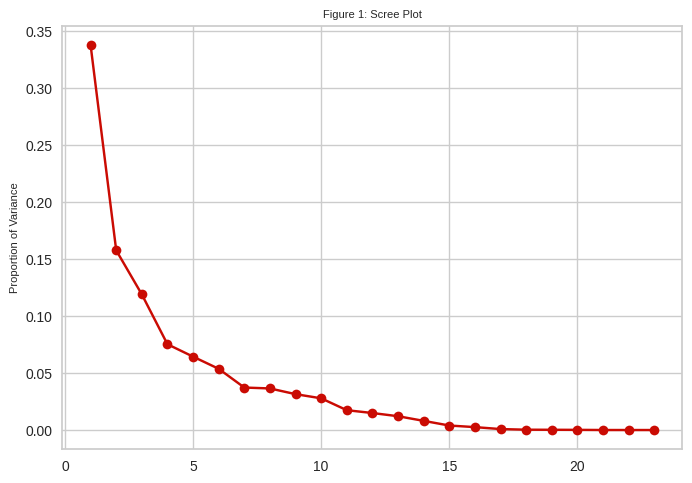

In [48]:
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

> ##### The first 5 components 
- Proportion variance = 80.66% 

#### Principal Component Calculation and Result Interpretation

In [57]:
pca = PCA(n_components=5)
PC = pca.fit_transform(scaled_features)

In [60]:
pca_diabetes = pd.DataFrame(data = PC, 
                                columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
 
print(pca_diabetes.shape)
pca_diabetes.head(5)

(64, 5)


,PC1,PC2,PC3,PC4,PC5
0,5.801561,-1.111737,-2.140113,-0.492085,-1.797862
1,0.623094,2.880929,0.368373,-0.058423,-1.074532
2,-0.285205,0.859239,0.236801,-0.517837,-0.667877
3,0.270824,-1.062714,1.252283,-0.576952,-0.358077
4,-0.774315,2.606439,0.786178,0.706921,-0.774807


/home/kannika/miniconda3/envs/tfNetV2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kannika/miniconda3/envs/tfNetV2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kannika/miniconda3/envs/tfNetV2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kannika/miniconda3/envs/tfNetV2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

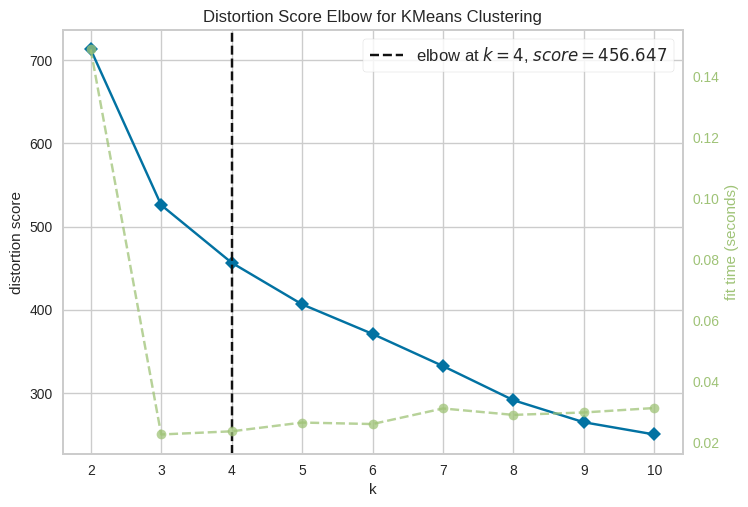

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)

visualizer.fit(pca_diabetes)        # Fit the data to the visualizer
visualizer.show()  

### #️⃣1. K=4

In [61]:
# Fit K-means clustering (**replace 'n_clusters' with the desired number of clusters**)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=30000,n_init=1000, random_state=0)
clusters_03 = kmeans.fit_predict(pca_diabetes)

In [74]:
# Add the cluster labels to the original data
## No., Code, sheet
pca_diabetes['Clusterk4'] = clusters_03
pca_diabetes['No.'] = DFcuster_concat['No.']
pca_diabetes['Code'] = DFcuster_concat['Code']
print(pca_diabetes.shape)
pca_diabetes.head()

(64, 8)


,PC1,PC2,PC3,PC4,PC5,No.,Code,Clusterk4
0,5.801561,-1.111737,-2.140113,-0.492085,-1.797862,5,HN05,2
1,0.623094,2.880929,0.368373,-0.058423,-1.074532,8,HN08,0
2,-0.285205,0.859239,0.236801,-0.517837,-0.667877,9,HN09,0
3,0.270824,-1.062714,1.252283,-0.576952,-0.358077,10,HN10,3
4,-0.774315,2.606439,0.786178,0.706921,-0.774807,11,HN11,0


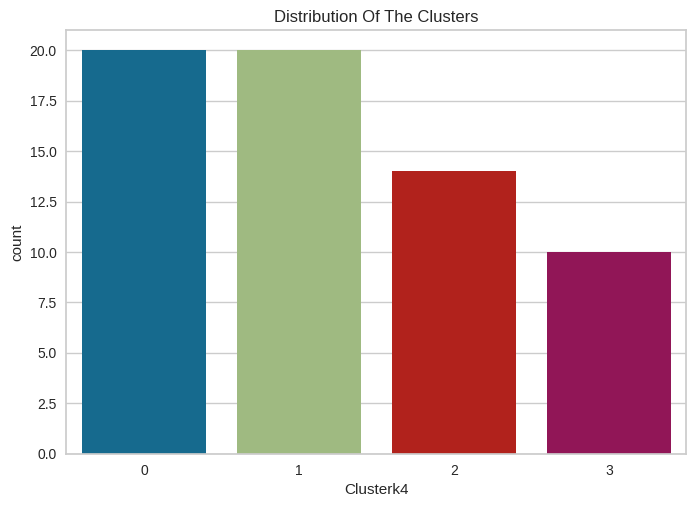

In [67]:
#Plotting countplot of clusters
import seaborn as sns

pl = sns.countplot(x=pca_diabetes["Clusterk4"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [76]:
DataFrame_Blood = pd.read_csv('/home/kannika/codes_AI/Rheology_Blood/All_lab_results_Blood_viscosity_plot.csv')
print(DataFrame_Blood.shape)
#result.head(3)

result_4cluster = pd.merge(DataFrame_Blood, pca_diabetes, how="left", on=["Code", "Code"])
result_4cluster_ =  result_4cluster[~result_4cluster.isnull().any(axis=1)]
print(result_4cluster_.shape)
result_4cluster_

(135, 6)
(129, 13)


,Unnamed: 0,name,Code,x,y,sheet,PC1,PC2,PC3,PC4,PC5,No.,Clusterk4
0,0,Row statistics of NBL07.csv,NBL07,19.828200,0.003430,Normal,-2.478323,1.595492,1.506165,1.569369,0.568773,8.0,1.0
1,1,Row statistics of NBL07.csv,NBL07,7.900978,0.008548,Normal,-2.478323,1.595492,1.506165,1.569369,0.568773,8.0,1.0
2,2,Row statistics of NBL07.csv,NBL07,5.604837,0.011782,Normal,-2.478323,1.595492,1.506165,1.569369,0.568773,8.0,1.0
3,3,Row statistics of HN38.csv,HN38,19.917410,0.002190,Patients_NoCutSpleen,0.271246,2.184019,0.427708,-0.915504,0.246040,38.0,0.0
4,4,Row statistics of HN38.csv,HN38,7.930730,0.005455,Patients_NoCutSpleen,0.271246,2.184019,0.427708,-0.915504,0.246040,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,130,Row statistics of HN30.csv,HN30,7.899895,0.006418,Patients_NoCutSpleen,2.941460,1.564405,3.655216,1.384521,-1.117455,30.0,3.0
131,131,Row statistics of HN30.csv,HN30,5.600707,0.008427,Patients_NoCutSpleen,2.941460,1.564405,3.655216,1.384521,-1.117455,30.0,3.0
132,132,Row statistics of HN31.csv,HN31,19.755610,0.001217,Patients_NoCutSpleen,2.341016,3.378322,-2.489929,-0.732990,0.541377,31.0,0.0
133,133,Row statistics of HN31.csv,HN31,7.845877,0.003036,Patients_NoCutSpleen,2.341016,3.378322,-2.489929,-0.732990,0.541377,31.0,0.0


In [84]:
result_4cluster_.to_csv('/home/kannika/codes_AI/Rheology_Blood/All_lab_results_Blood_viscosity_clusterPCA4k.csv')

4
[INFO] Cluster : 0.0 with Shape ==> 39
[INFO] Cluster : 1.0 with Shape ==> 45
[INFO] Cluster : 2.0 with Shape ==> 27
[INFO] Cluster : 3.0 with Shape ==> 18


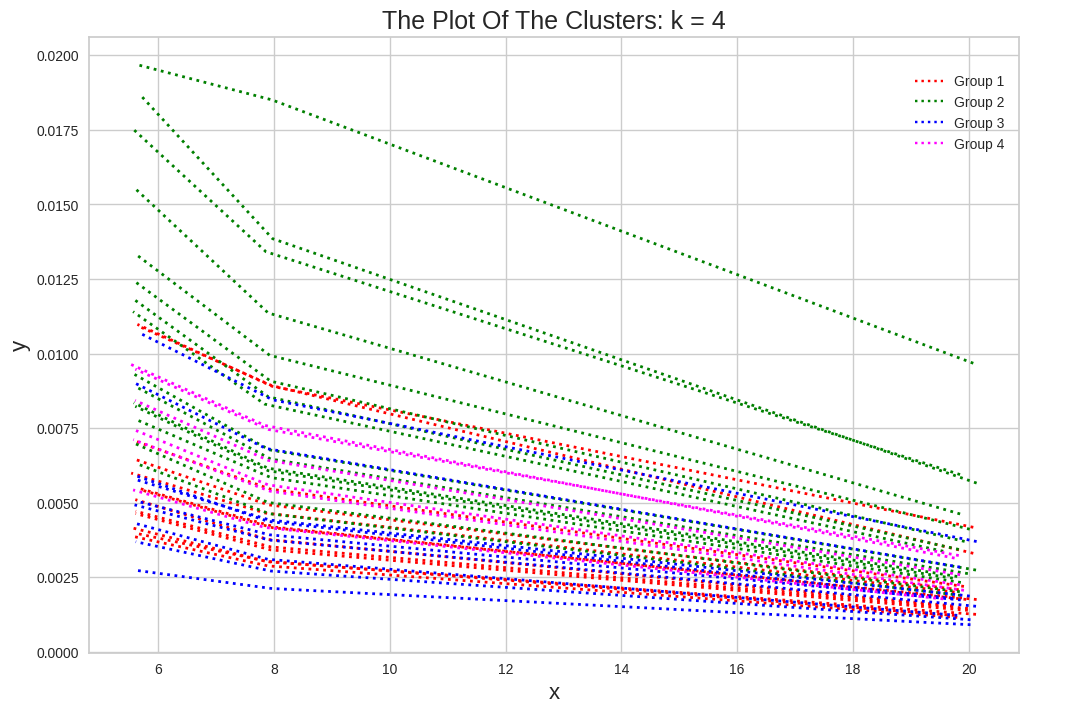

In [83]:
import matplotlib.pyplot as plt


set_sheet = list(set(result_4cluster_['Clusterk4']))
print(len(set_sheet))
set_sheet
#lt.figure(figsize=(12, 8))
fig = plt.figure(figsize=(12, 8))
handles_markers = []
markers_labels = []
colors_labels = []
for s in set_sheet:
    result0 = result_4cluster_[result_4cluster_["Clusterk4"]==s]
    if s == 0.0:
        colors="red"
        markers="^"
    elif s == 1.0:
        colors="green"
        markers="8"
    elif s == 2.0:
        colors="blue"
        markers="s"
    elif s == 3.0:
        colors="fuchsia"
        markers=">"
    markers_labels.append(markers)
    colors_labels.append(colors)
    print(f"[INFO] Cluster : {s} with Shape ==> {result0.shape[0]}")
    set_code = list(set(result0["Code"]))
    for sc in set_code:
        df_SetCode = result0[result0["Code"]==sc].reset_index(drop=True)    
        x = df_SetCode["x"].tolist()
        y = df_SetCode["y"].tolist()
    
        #plt.style.use('seaborn')
        plot_handles = plt.plot(x, y, ls=":", marker=markers, markersize=5,lw=2, markerfacecolor="None",color=colors)
        markers_labels.append(s)
        handles_markers.append(handles_markers)
       #plt.plot(x, y, ls=":", marker="8", markersize=4, lw=2, markerfacecolor="None",color=colors)
       #plt.plot(t_x, list_preEff, ls=":", marker="^", markersize=4, lw=2, markerfacecolor="None", label="EffNetB7 Model")
#         plt.plot(t_x, list_meanM, ls=":", marker="s", markersize=4, lw=2, markerfacecolor="None", label="MSDT Algorithm", color="red")

plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.title('The Plot Of The Clusters: k = 4', fontsize=18)

import matplotlib.lines as mlines
red_line = mlines.Line2D([], [], color='red',markersize=5, label='Group 1', linestyle=":", marker="^", markerfacecolor="None")
green_line = mlines.Line2D([], [], color='green', markersize=5, label='Group 2', linestyle=":", marker="8", markerfacecolor="None")
blue_line = mlines.Line2D([], [], color='blue', markersize=5, label='Group 3', linestyle=":", marker="s", markerfacecolor="None")
gold_line = mlines.Line2D([], [], color='fuchsia', markersize=5, label='Group 4', linestyle=":", marker=">", markerfacecolor="None")

handles = [red_line,green_line, blue_line, gold_line]
labels = [h.get_label() for h in handles] 

fig.legend(handles=handles, labels=labels, borderaxespad=5)

plt.show()

### #️⃣1. K=3

In [100]:
pca_diabetes = pd.DataFrame(data = PC, 
                                columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
 
print(pca_diabetes.shape)
pca_diabetes.head(5)

(64, 5)


,PC1,PC2,PC3,PC4,PC5
0,5.801561,-1.111737,-2.140113,-0.492085,-1.797862
1,0.623094,2.880929,0.368373,-0.058423,-1.074532
2,-0.285205,0.859239,0.236801,-0.517837,-0.667877
3,0.270824,-1.062714,1.252283,-0.576952,-0.358077
4,-0.774315,2.606439,0.786178,0.706921,-0.774807


In [87]:
# Fit K-means clustering (**replace 'n_clusters' with the desired number of clusters**)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=30000,n_init=1000, random_state=0)
clusters_04 = kmeans.fit_predict(pca_diabetes)

In [90]:
# Add the cluster labels to the original data
## No., Code, sheet
pca_diabetes['No.'] = DFcuster_concat['No.']
pca_diabetes['Code'] = DFcuster_concat['Code']
pca_diabetes['Clusterk3'] = clusters_04
print(pca_diabetes.shape)
pca_diabetes.head()

(64, 8)


,PC1,PC2,PC3,PC4,PC5,No.,Code,Clusterk3
0,5.801561,-1.111737,-2.140113,-0.492085,-1.797862,5,HN05,0
1,0.623094,2.880929,0.368373,-0.058423,-1.074532,8,HN08,1
2,-0.285205,0.859239,0.236801,-0.517837,-0.667877,9,HN09,1
3,0.270824,-1.062714,1.252283,-0.576952,-0.358077,10,HN10,0
4,-0.774315,2.606439,0.786178,0.706921,-0.774807,11,HN11,1


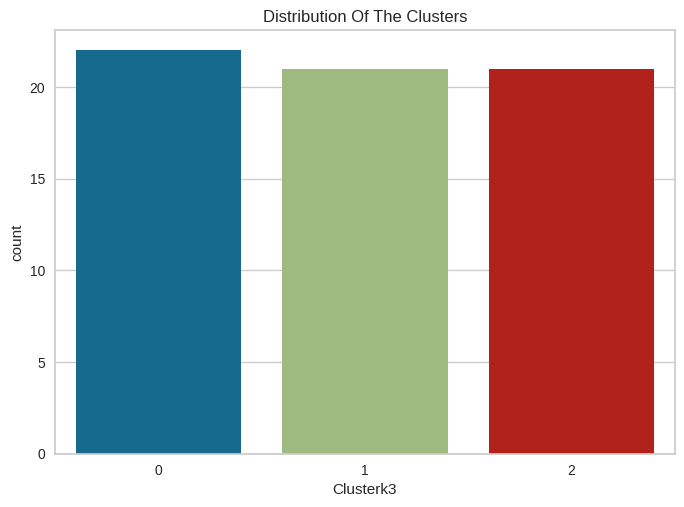

In [91]:
#Plotting countplot of clusters
import seaborn as sns

pl = sns.countplot(x=pca_diabetes["Clusterk3"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [92]:
result_3cluster = pd.merge(DataFrame_Blood, pca_diabetes, how="left", on=["Code", "Code"])
result_3cluster_ =  result_3cluster[~result_3cluster.isnull().any(axis=1)]
print(result_3cluster_.shape)
result_3cluster_

(129, 13)


,Unnamed: 0,name,Code,x,y,sheet,PC1,PC2,PC3,PC4,PC5,No.,Clusterk3
0,0,Row statistics of NBL07.csv,NBL07,19.828200,0.003430,Normal,-2.478323,1.595492,1.506165,1.569369,0.568773,8.0,2.0
1,1,Row statistics of NBL07.csv,NBL07,7.900978,0.008548,Normal,-2.478323,1.595492,1.506165,1.569369,0.568773,8.0,2.0
2,2,Row statistics of NBL07.csv,NBL07,5.604837,0.011782,Normal,-2.478323,1.595492,1.506165,1.569369,0.568773,8.0,2.0
3,3,Row statistics of HN38.csv,HN38,19.917410,0.002190,Patients_NoCutSpleen,0.271246,2.184019,0.427708,-0.915504,0.246040,38.0,1.0
4,4,Row statistics of HN38.csv,HN38,7.930730,0.005455,Patients_NoCutSpleen,0.271246,2.184019,0.427708,-0.915504,0.246040,38.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,130,Row statistics of HN30.csv,HN30,7.899895,0.006418,Patients_NoCutSpleen,2.941460,1.564405,3.655216,1.384521,-1.117455,30.0,1.0
131,131,Row statistics of HN30.csv,HN30,5.600707,0.008427,Patients_NoCutSpleen,2.941460,1.564405,3.655216,1.384521,-1.117455,30.0,1.0
132,132,Row statistics of HN31.csv,HN31,19.755610,0.001217,Patients_NoCutSpleen,2.341016,3.378322,-2.489929,-0.732990,0.541377,31.0,1.0
133,133,Row statistics of HN31.csv,HN31,7.845877,0.003036,Patients_NoCutSpleen,2.341016,3.378322,-2.489929,-0.732990,0.541377,31.0,1.0


In [93]:
result_3cluster_.to_csv('/home/kannika/codes_AI/Rheology_Blood/All_lab_results_Blood_viscosity_clusterPCA3k.csv')

3
[INFO] Cluster : 0.0 with Shape ==> 39
[INFO] Cluster : 1.0 with Shape ==> 42
[INFO] Cluster : 2.0 with Shape ==> 48


/tmp/ipykernel_209302/1064288956.py:54: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


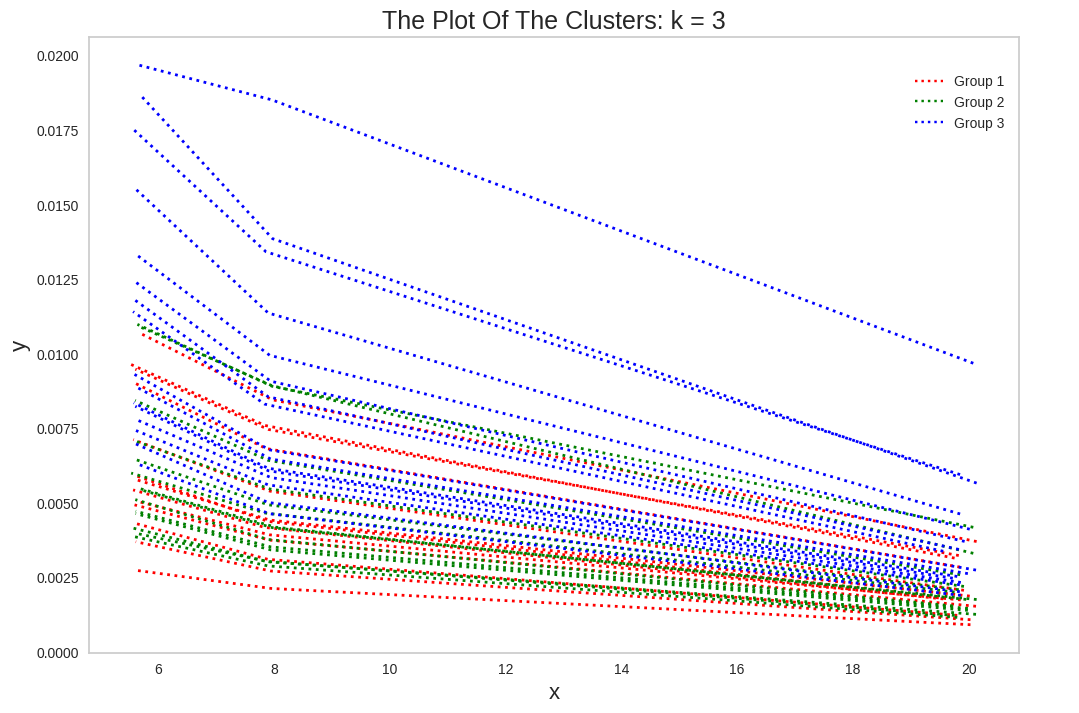

In [98]:
import matplotlib.pyplot as plt


set_sheet = list(set(result_3cluster_['Clusterk3']))
print(len(set_sheet))
set_sheet
#lt.figure(figsize=(12, 8))
fig = plt.figure(figsize=(12, 8))
handles_markers = []
markers_labels = []
colors_labels = []
for s in set_sheet:
    result0 = result_3cluster_[result_3cluster_["Clusterk3"]==s]
    if s == 0.0:
        colors="red"
        markers="^"
    elif s == 1.0:
        colors="green"
        markers="8"
    elif s == 2.0:
        colors="blue"
        markers="s"
    markers_labels.append(markers)
    colors_labels.append(colors)
    print(f"[INFO] Cluster : {s} with Shape ==> {result0.shape[0]}")
    set_code = list(set(result0["Code"]))
    for sc in set_code:
        df_SetCode = result0[result0["Code"]==sc].reset_index(drop=True)    
        x = df_SetCode["x"].tolist()
        y = df_SetCode["y"].tolist()
    
        #plt.style.use('seaborn')
        plot_handles = plt.plot(x, y, ls=":", marker=markers, markersize=5,lw=2, markerfacecolor="None",color=colors)
        markers_labels.append(s)
        handles_markers.append(handles_markers)
       #plt.plot(x, y, ls=":", marker="8", markersize=4, lw=2, markerfacecolor="None",color=colors)
       #plt.plot(t_x, list_preEff, ls=":", marker="^", markersize=4, lw=2, markerfacecolor="None", label="EffNetB7 Model")
#         plt.plot(t_x, list_meanM, ls=":", marker="s", markersize=4, lw=2, markerfacecolor="None", label="MSDT Algorithm", color="red")

plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.title('The Plot Of The Clusters: k = 3', fontsize=18)

import matplotlib.lines as mlines
red_line = mlines.Line2D([], [], color='red',markersize=5, label='Group 1', linestyle=":", marker="^", markerfacecolor="None")
green_line = mlines.Line2D([], [], color='green', markersize=5, label='Group 2', linestyle=":", marker="8", markerfacecolor="None")
blue_line = mlines.Line2D([], [], color='blue', markersize=5, label='Group 3', linestyle=":", marker="s", markerfacecolor="None")

handles = [red_line,green_line, blue_line]
labels = [h.get_label() for h in handles] 

fig.legend(handles=handles, labels=labels, borderaxespad=5)

plt.grid(b=None)
plt.show()

### #️⃣3. K=2

In [114]:
pca_diabetes = pd.DataFrame(data = PC, 
                                columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
 
print(pca_diabetes.shape)
pca_diabetes.head(5)

(64, 5)


,PC1,PC2,PC3,PC4,PC5
0,5.801561,-1.111737,-2.140113,-0.492085,-1.797862
1,0.623094,2.880929,0.368373,-0.058423,-1.074532
2,-0.285205,0.859239,0.236801,-0.517837,-0.667877
3,0.270824,-1.062714,1.252283,-0.576952,-0.358077
4,-0.774315,2.606439,0.786178,0.706921,-0.774807


### 🧸sklearn.cluster.Birch

In [109]:
pca_diabetes = pd.DataFrame(data = PC, 
                                columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
 
print(pca_diabetes.shape)
pca_diabetes.head(5)

(64, 5)


,PC1,PC2,PC3,PC4,PC5
0,5.801561,-1.111737,-2.140113,-0.492085,-1.797862
1,0.623094,2.880929,0.368373,-0.058423,-1.074532
2,-0.285205,0.859239,0.236801,-0.517837,-0.667877
3,0.270824,-1.062714,1.252283,-0.576952,-0.358077
4,-0.774315,2.606439,0.786178,0.706921,-0.774807


In [110]:
from sklearn.cluster import Birch


BP = Birch(n_clusters=3)
# fit model and predict clusters
BP_df = BP.fit_predict(pca_diabetes)
BP_df

# Add the cluster labels to the original data
## No., Code, sheet
pca_diabetes['No.'] = DFcuster_concat['No.']
pca_diabetes['Code'] = DFcuster_concat['Code']
pca_diabetes['Birchk3'] = BP_df
print(pca_diabetes.shape)
pca_diabetes.head()

(64, 8)


,PC1,PC2,PC3,PC4,PC5,No.,Code,Birchk3
0,5.801561,-1.111737,-2.140113,-0.492085,-1.797862,5,HN05,0
1,0.623094,2.880929,0.368373,-0.058423,-1.074532,8,HN08,2
2,-0.285205,0.859239,0.236801,-0.517837,-0.667877,9,HN09,0
3,0.270824,-1.062714,1.252283,-0.576952,-0.358077,10,HN10,0
4,-0.774315,2.606439,0.786178,0.706921,-0.774807,11,HN11,2


In [112]:
Birch_cluster = pd.merge(DataFrame_Blood, pca_diabetes, how="left", on=["Code", "Code"])
Birch_cluster =  Birch_cluster[~Birch_cluster.isnull().any(axis=1)]

print(Birch_cluster.shape)
Birch_cluster.head(3)

(129, 13)


,Unnamed: 0,name,Code,x,y,sheet,PC1,PC2,PC3,PC4,PC5,No.,Birchk3
0,0,Row statistics of NBL07.csv,NBL07,19.828200,0.003430,Normal,-2.478323,1.595492,1.506165,1.569369,0.568773,8.0,1.0
1,1,Row statistics of NBL07.csv,NBL07,7.900978,0.008548,Normal,-2.478323,1.595492,1.506165,1.569369,0.568773,8.0,1.0
2,2,Row statistics of NBL07.csv,NBL07,5.604837,0.011782,Normal,-2.478323,1.595492,1.506165,1.569369,0.568773,8.0,1.0


In [113]:
Birch_cluster.to_csv('/home/kannika/codes_AI/Rheology_Blood/All_lab_results_Blood_viscosity_BirchCluster.csv')